In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path_to_eur_usd_data = "C:/Users/Maciej/PycharmProjects/FinDL/data/EURUSD_1m.csv"
eur_usd_1m_df = pd.read_csv(path_to_eur_usd_data, sep="\t", names=["date", "open", "high", "low", "close", "volume"], index_col=0, parse_dates=True)
eur_usd_1m_df.head()

,open,high,low,close,volume
date,,,,,
2023-01-08 22:23:00,1.06520,1.06542,1.06519,1.06541,248
2023-01-08 22:24:00,1.06541,1.06541,1.06512,1.06513,140
2023-01-08 22:25:00,1.06516,1.06522,1.06512,1.06514,166
2023-01-08 22:26:00,1.06516,1.06540,1.06514,1.06537,94
2023-01-08 22:27:00,1.06538,1.06548,1.06536,1.06546,149


In [3]:
eur_usd_1m_df.describe()

,open,high,low,close,volume
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.076987,1.077075,1.076898,1.076986,274.671450
std,0.012223,0.012219,0.012228,0.012223,266.633277
min,1.051940,1.052270,1.051580,1.051920,1.000000
25%,1.067370,1.067460,1.067270,1.067370,99.000000
50%,1.076560,1.076650,1.076480,1.076560,202.000000
75%,1.086940,1.087010,1.086860,1.086930,358.000000
max,1.107420,1.107580,1.107250,1.107420,3321.000000


We have 100k datapoints = ~14 weeks of data

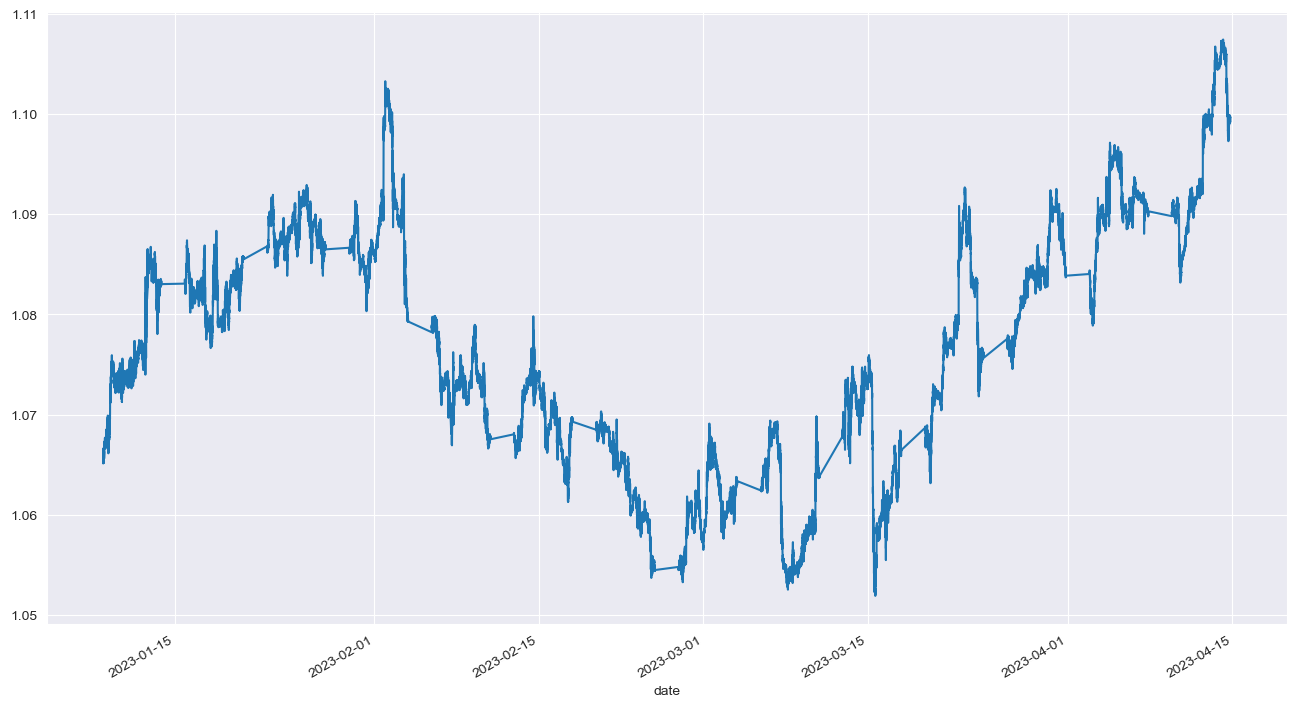

In [4]:
# plot the closing prices
eur_usd_1m_df["close"].plot(figsize=(16, 9))
plt.show()

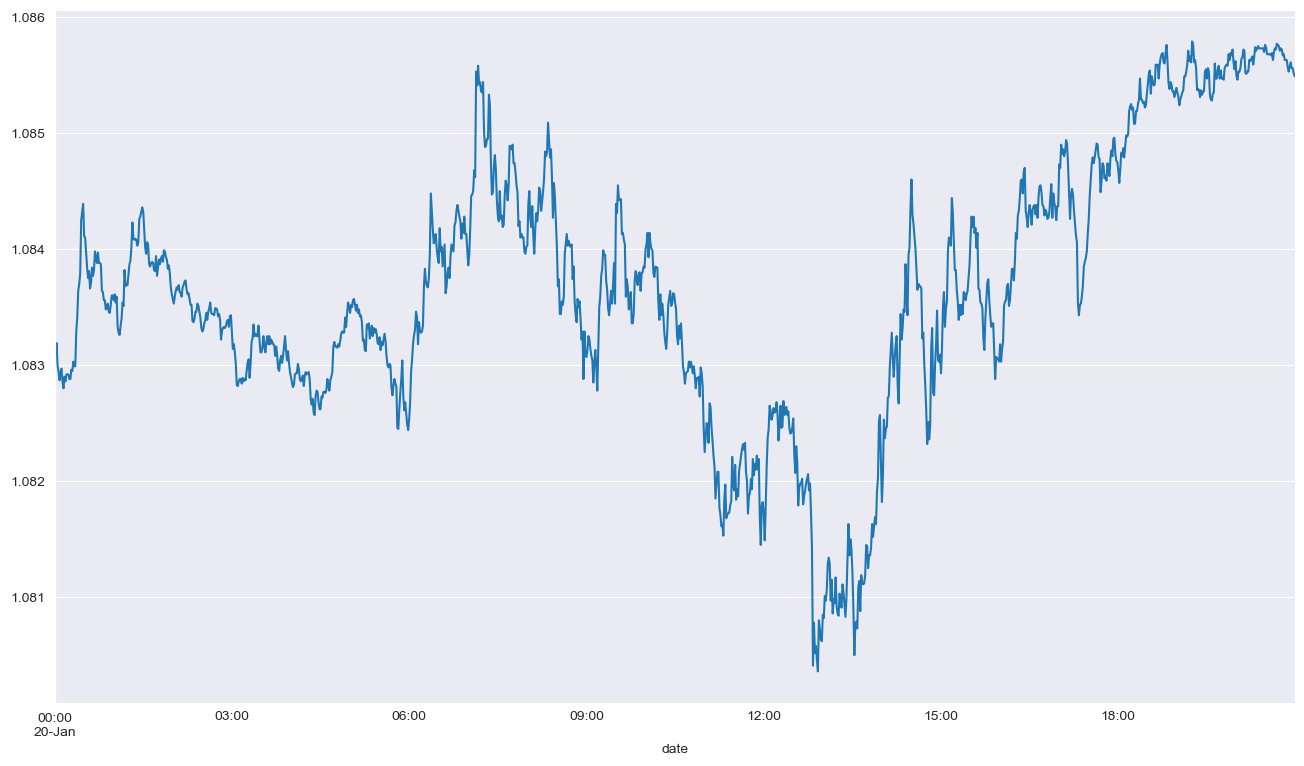

In [5]:
# sample data from single day and that day is 2023-01-20
eur_usd_1m_df["close"].loc["2023-01-20"].plot(figsize=(16, 9))
plt.show()

In [6]:
# import preprocessing fucntions from utils
from environments.utils import add_ta_features, add_time_features_forex

In [ ]:
eur_usd_1m_ta_df = add_ta_features(eur_usd_1m_df)

C:\Users\Maciej\anaconda3\envs\pytorch_gpu\lib\site-packages\finta\finta.py:399: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for x, y in zip(x.fillna(0).iteritems(), y.iteritems()):
C:\Users\Maciej\anaconda3\envs\pytorch_gpu\lib\site-packages\finta\finta.py:399: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for x, y in zip(x.fillna(0).iteritems(), y.iteritems()):
C:\Users\Maciej\anaconda3\envs\pytorch_gpu\lib\site-packages\finta\finta.py:399: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for x, y in zip(x.fillna(0).iteritems(), y.iteritems()):
C:\Users\Maciej\anaconda3\envs\pytorch_gpu\lib\site-packages\finta\finta.py:399: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for x, y in zip(x.fillna(0).iteritems(), y.iteritems()):
C:\Users\Maciej\anaconda3\envs\pytorch_g

In [14]:
eur_usd_1m_ta_df.head(100)

,open,high,low,close,volume,ADL,ADX,AO,ATR,BBWIDTH,...,VAMA,VBM,VFI,VPT,VWAP,VZO,WILLIAMS,WMA,WOBV,ZLEMA
date,,,,,,,,,,,,,,,,,,,,,
2023-01-08 22:23:00,1.06520,1.06542,1.06519,1.06541,248,226.434783,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,452.869565,1.065340,0.000000,NaN,NaN,NaN,NaN
2023-01-08 22:24:00,1.06541,1.06541,1.06512,1.06513,140,96.089955,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,182.524738,1.065297,-39.444027,NaN,NaN,-0.03920,NaN
2023-01-08 22:25:00,1.06516,1.06522,1.06512,1.06514,166,-3.510045,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,116.124738,1.065256,9.431129,NaN,NaN,-0.03754,NaN
2023-01-08 22:26:00,1.06516,1.06540,1.06514,1.06537,94,68.797647,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,267.970891,1.065263,26.307505,NaN,NaN,-0.01592,NaN
2023-01-08 22:27:00,1.06538,1.06548,1.06536,1.06546,149,168.130981,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,466.637558,1.065295,45.038637,NaN,NaN,-0.00251,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-08 23:58:00,1.06579,1.06590,1.06573,1.06590,68,435.208826,21.632522,0.000237,0.000159,0.000747,...,1.065708,-6514.927059,NaN,759.240585,1.065772,10.347755,-0.000000,1.065764,-0.12747,1.065708
2023-01-08 23:59:00,1.06591,1.06612,1.06590,1.06611,182,600.663371,23.122214,0.000314,0.000169,0.000880,...,1.065829,-6469.322430,NaN,1090.149676,1.065774,24.352430,-1.063830,1.065845,-0.08925,1.065781
2023-01-09 00:00:00,1.06613,1.06616,1.06595,1.06605,273,587.663371,24.655981,0.000372,0.000164,0.000964,...,1.065889,-6423.206497,NaN,882.149676,1.065778,-2.112861,-13.580247,1.065900,-0.10563,1.065848


In [15]:
eur_usd_1m_ta_df.describe()

,open,high,low,close,volume,ADL,ADX,AO,ATR,BBWIDTH,...,VAMA,VBM,VFI,VPT,VWAP,VZO,WILLIAMS,WMA,WOBV,ZLEMA
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,98454.000000,99987.000000,99967.000000,99987.000000,99981.000000,...,99986.000000,9.997500e+04,99869.000000,9.845400e+04,100000.000000,100000.000000,99953.000000,99992.000000,99999.000000,99988.000000
mean,1.076987,1.077075,1.076898,1.076986,274.671450,-321452.429104,24.575968,0.000005,0.000179,0.000813,...,1.076984,-9.117738e+03,-2.152579,-5.059805e+05,1.076603,-1.334478,-49.754335,1.076986,-54.395772,1.076987
std,0.012223,0.012219,0.012228,0.012223,266.633277,201350.552037,9.592868,0.000426,0.000123,0.000690,...,0.012221,2.499133e+04,12.482325,3.180671e+05,0.003750,26.979233,30.924956,0.012222,35.277502,0.012225
min,1.051940,1.052270,1.051580,1.051920,1.000000,-633489.730753,6.538389,-0.005514,0.000000,0.000000,...,1.052266,-2.857556e+06,-51.282954,-1.044415e+06,1.065256,-96.479700,-100.000000,1.052276,-104.759410,1.052023
25%,1.067370,1.067460,1.067270,1.067370,99.000000,-503179.097737,17.478099,-0.000179,0.000099,0.000401,...,1.067364,-1.083937e+04,-10.686650,-7.409906e+05,1.073324,-19.831111,-77.611940,1.067361,-82.425240,1.067346
50%,1.076560,1.076650,1.076480,1.076560,202.000000,-335336.261402,22.778232,0.000008,0.000154,0.000636,...,1.076555,-6.974828e+03,-2.392664,-5.355607e+05,1.075487,-1.281643,-49.275362,1.076556,-64.131700,1.076554
75%,1.086940,1.087010,1.086860,1.086930,358.000000,-123959.277055,29.804520,0.000194,0.000225,0.001004,...,1.086935,-4.772306e+03,6.036252,-1.898086e+05,1.079788,17.148159,-21.875000,1.086935,-16.399045,1.086940
max,1.107420,1.107580,1.107250,1.107420,3321.000000,13952.990587,100.000000,0.004942,0.002521,0.011880,...,1.107226,-5.602799e+02,43.956242,1.827515e+04,1.083841,94.118858,-0.000000,1.107221,14.441780,1.107261


In [16]:
# print how many columns we have
print(len(eur_usd_1m_ta_df.columns))

65


In [17]:
# remove columns with average values greater than 1000 or less than -1000
eur_usd_1m_ta_df_no_outliers = eur_usd_1m_ta_df.loc[:, (eur_usd_1m_ta_df.mean() < 1000) & (eur_usd_1m_ta_df.mean() > -1000)]
# print how many columns we have after removing outliers
print(len(eur_usd_1m_ta_df_no_outliers.columns))

61


In [18]:
# add time features
eur_usd_1m_ta_df_no_outliers_time_features = add_time_features_forex(eur_usd_1m_ta_df_no_outliers)
# show first 100 rows
eur_usd_1m_ta_df_no_outliers_time_features.head(100)

C:\Users\Maciej\PycharmProjects\FinDL\environments\utils.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['weekday'] = df_.index.dayofweek
C:\Users\Maciej\PycharmProjects\FinDL\environments\utils.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['monthday'] = df_.index.day
C:\Users\Maciej\PycharmProjects\FinDL\environments\utils.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,open,high,low,close,volume,ADX,AO,ATR,BBWIDTH,BOP,...,sin_weekday,cos_weekday,sin_monthday,cos_monthday,sin_yearday,cos_yearday,sin_hour,cos_hour,sin_minute,cos_minute
date,,,,,,,,,,,,,,,,,,,,,
2023-01-08 22:23:00,1.06520,1.06542,1.06519,1.06541,248,NaN,NaN,NaN,NaN,0.913043,...,-0.781831,0.62349,0.998717,-0.050649,0.137279,0.990532,-0.500000,0.866025,0.669131,-0.743145
2023-01-08 22:24:00,1.06541,1.06541,1.06512,1.06513,140,NaN,NaN,NaN,NaN,-0.965517,...,-0.781831,0.62349,0.998717,-0.050649,0.137279,0.990532,-0.500000,0.866025,0.587785,-0.809017
2023-01-08 22:25:00,1.06516,1.06522,1.06512,1.06514,166,NaN,NaN,NaN,NaN,-0.200000,...,-0.781831,0.62349,0.998717,-0.050649,0.137279,0.990532,-0.500000,0.866025,0.500000,-0.866025
2023-01-08 22:26:00,1.06516,1.06540,1.06514,1.06537,94,NaN,NaN,NaN,NaN,0.807692,...,-0.781831,0.62349,0.998717,-0.050649,0.137279,0.990532,-0.500000,0.866025,0.406737,-0.913545
2023-01-08 22:27:00,1.06538,1.06548,1.06536,1.06546,149,NaN,NaN,NaN,NaN,0.666667,...,-0.781831,0.62349,0.998717,-0.050649,0.137279,0.990532,-0.500000,0.866025,0.309017,-0.951057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-08 23:58:00,1.06579,1.06590,1.06573,1.06590,68,21.632522,0.000237,0.000159,0.000747,0.647059,...,-0.781831,0.62349,0.998717,-0.050649,0.137279,0.990532,-0.258819,0.965926,-0.207912,0.978148
2023-01-08 23:59:00,1.06591,1.06612,1.06590,1.06611,182,23.122214,0.000314,0.000169,0.000880,0.909091,...,-0.781831,0.62349,0.998717,-0.050649,0.137279,0.990532,-0.258819,0.965926,-0.104528,0.994522
2023-01-09 00:00:00,1.06613,1.06616,1.06595,1.06605,273,24.655981,0.000372,0.000164,0.000964,-0.380952,...,0.000000,1.00000,0.968077,-0.250653,0.154309,0.988023,0.000000,1.000000,0.000000,1.000000


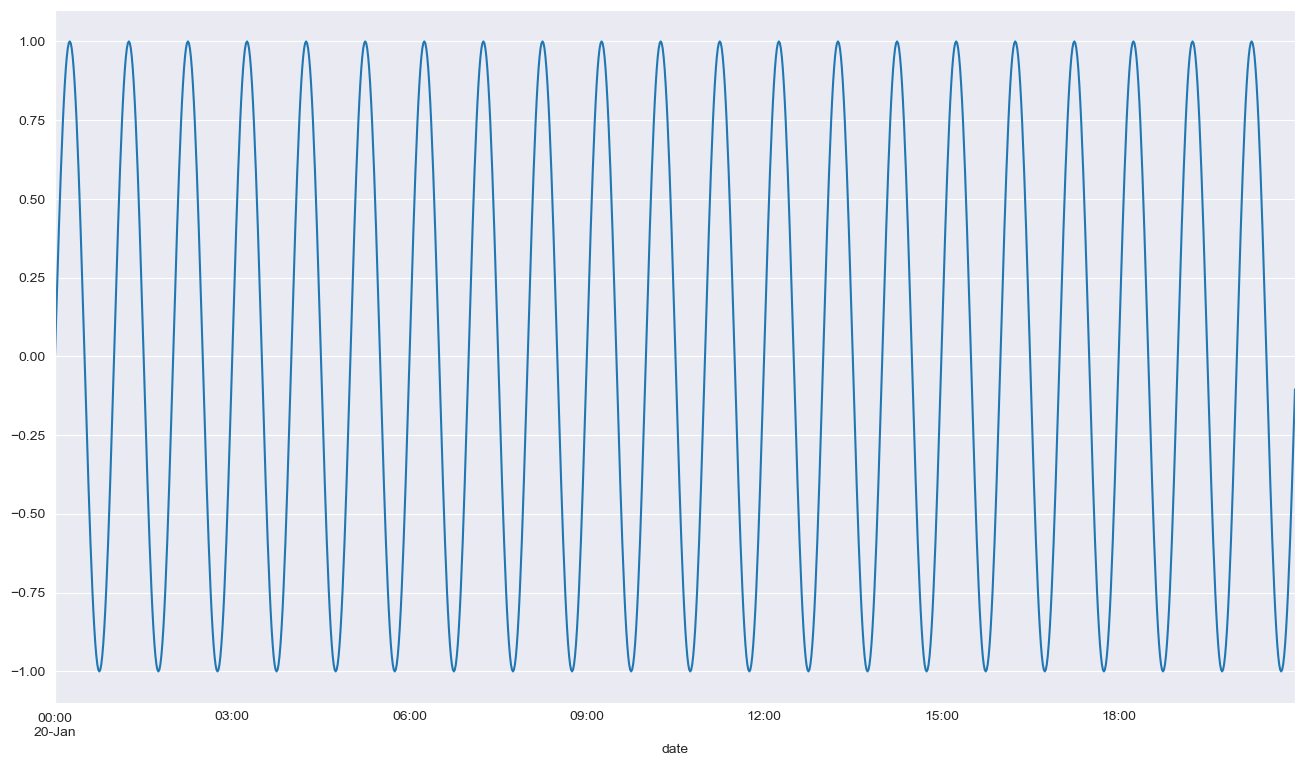

In [20]:
# plot sin of minutes from 2023-01-20
eur_usd_1m_ta_df_no_outliers_time_features["sin_minute"].loc["2023-01-20"].plot(figsize=(16, 9))
plt.show()

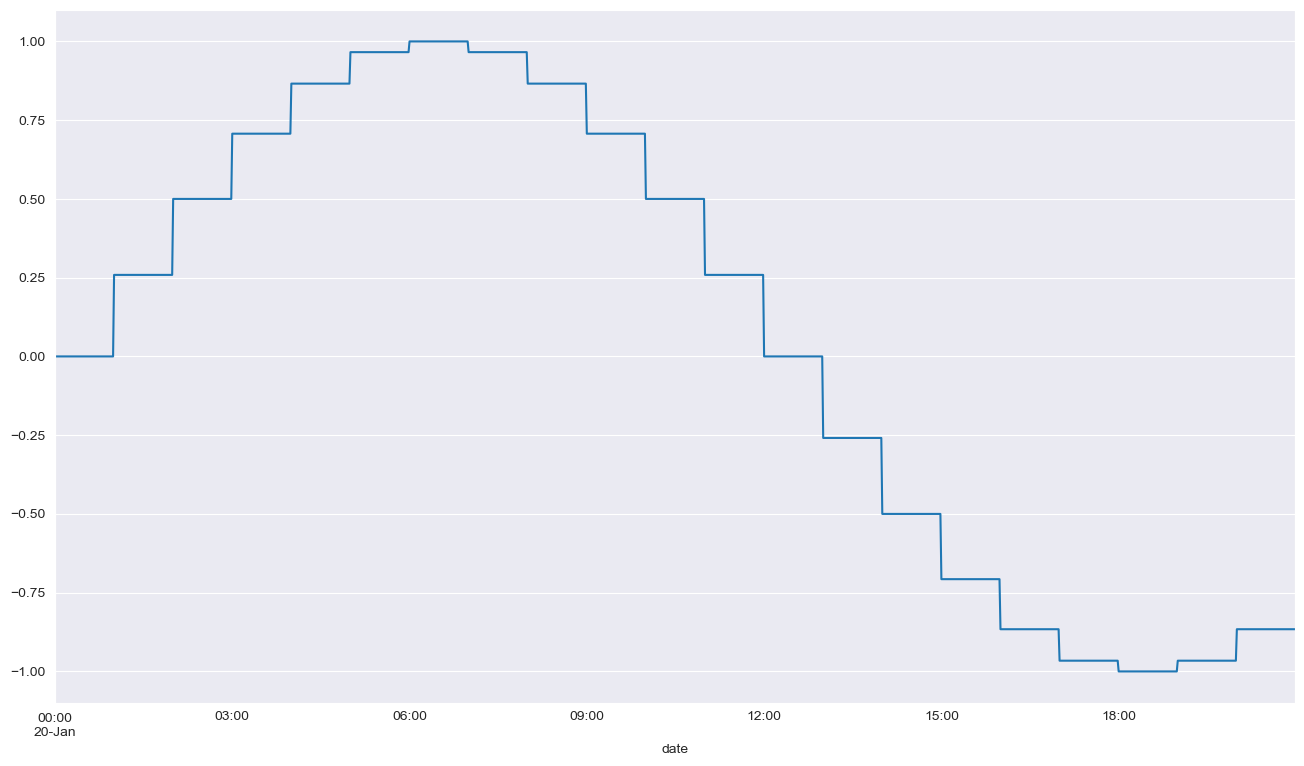

In [21]:
# plot sin of hours from 2023-01-20
eur_usd_1m_ta_df_no_outliers_time_features["sin_hour"].loc["2023-01-20"].plot(figsize=(16, 9))
plt.show()

### Save data to csv so we can reuse it later without preprocessing

In [22]:
# save dataframe to csv with tab separator
eur_usd_1m_ta_df_no_outliers_time_features.to_csv("C:/Users/Maciej/PycharmProjects/FinDL/data/EURUSD_1m_ta_tf.csv", sep="\t", index=True)

In [ ]:
# load ready csv


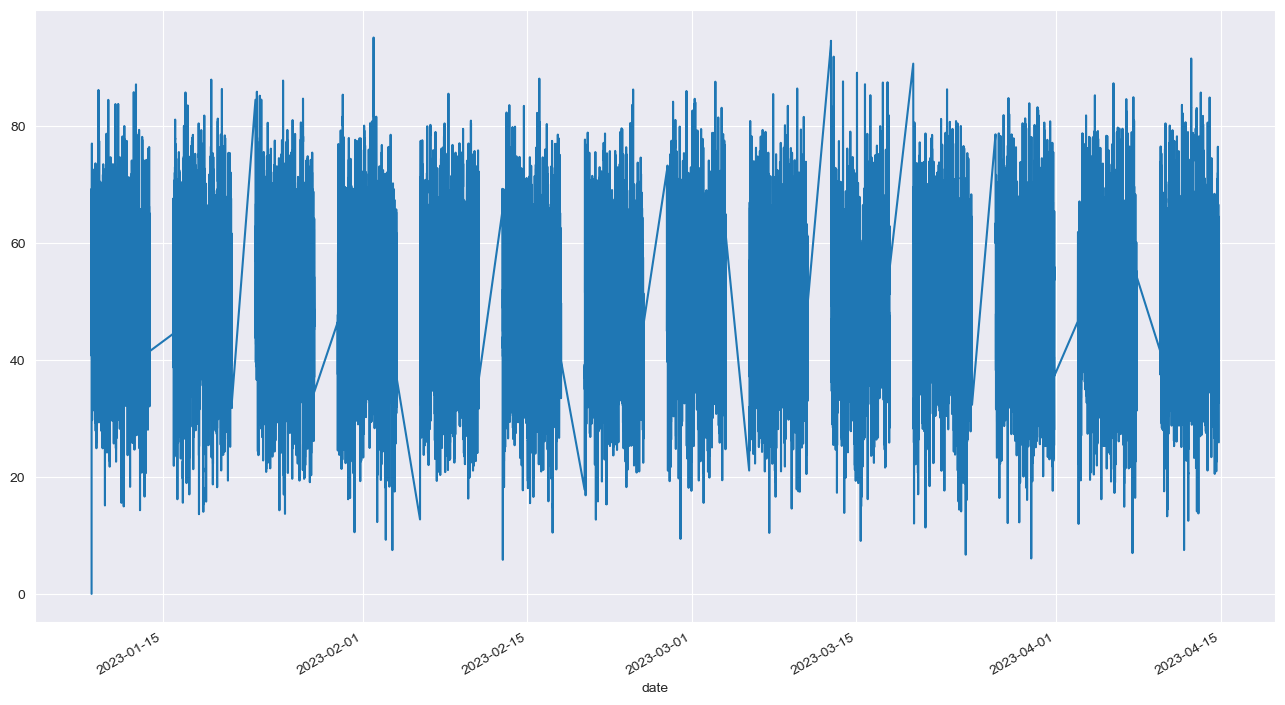

In [23]:
# plot RSI indicator
eur_usd_1m_ta_df_no_outliers_time_features["RSI"].plot(figsize=(16, 9))
plt.show()

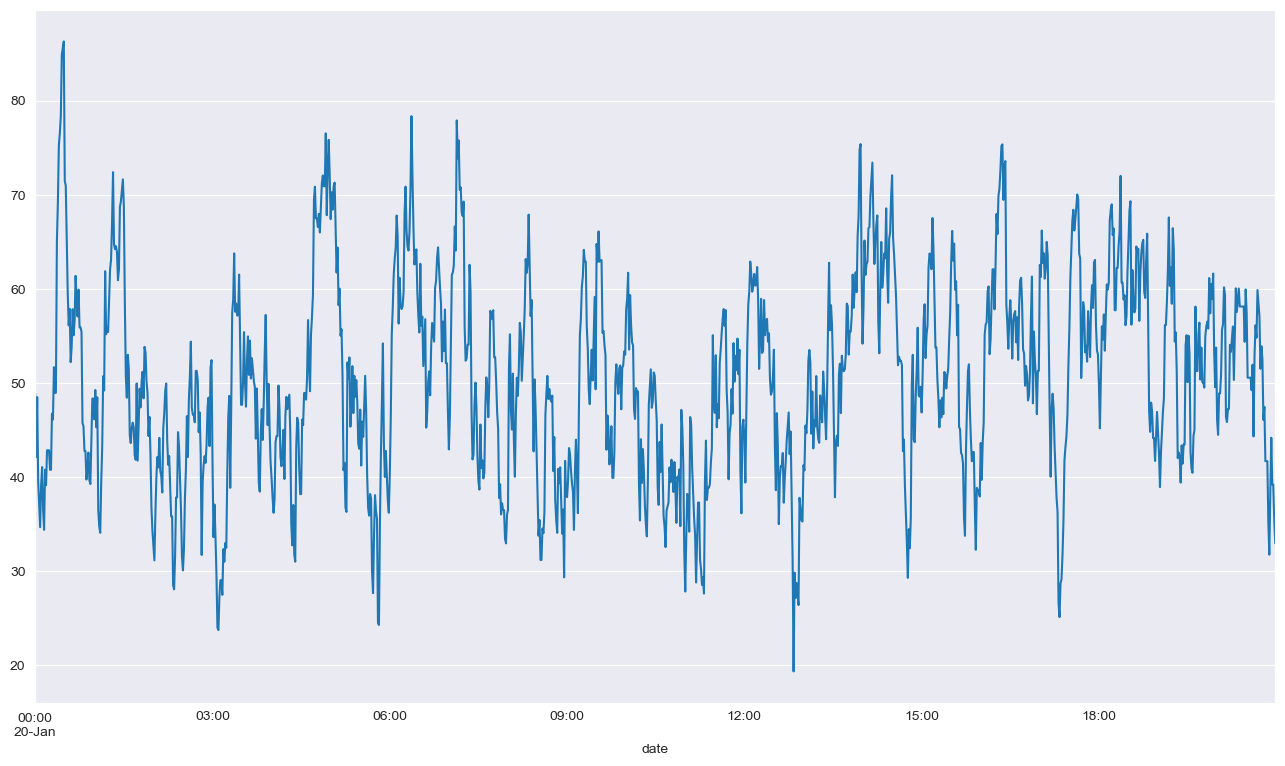

In [24]:
# plot RSI from 2023-01-20
eur_usd_1m_ta_df_no_outliers_time_features["RSI"].loc["2023-01-20"].plot(figsize=(16, 9))
plt.show()

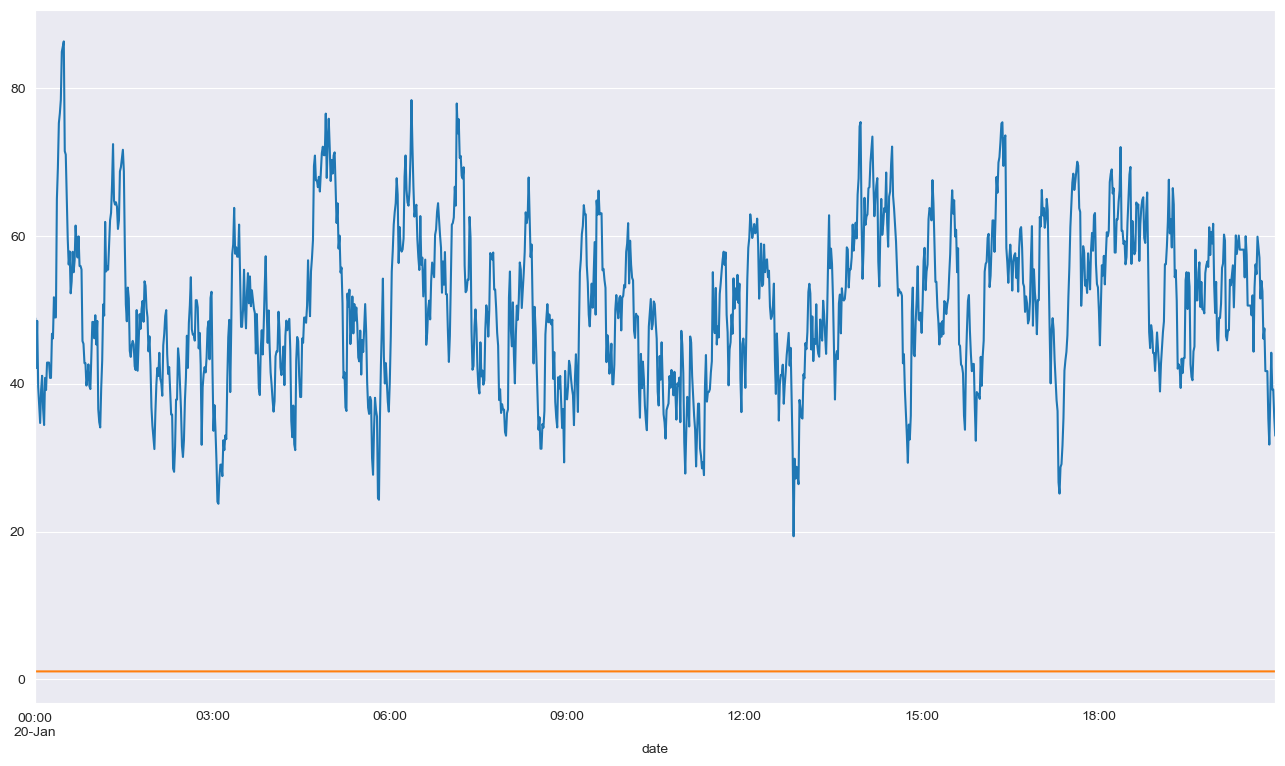

In [25]:
# plot RSI and close from 2023-01-20
eur_usd_1m_ta_df_no_outliers_time_features["RSI"].loc["2023-01-20"].plot(figsize=(16, 9))
eur_usd_1m_ta_df_no_outliers_time_features["close"].loc["2023-01-20"].plot(figsize=(16, 9))
plt.show()

In [8]:
# load the data with ta and time features
eur_usd_1m_ta_df_no_outliers_time_features = pd.read_csv("C:/Users/Maciej/PycharmProjects/FinDL/data/EURUSD_1m_ta_tf.csv", sep="\t", index_col=0, parse_dates=True)

In [ ]:
# plot RSI and close from 2023-01-20 on a single plot with different y axis
fig, ax1 = plt.subplots(figsize=(16, 9))
ax2 = ax1.twinx()
ax1.plot(eur_usd_1m_ta_df_no_outliers_time_features["RSI"].loc["2023-01-20"], color="red")
ax2.plot(eur_usd_1m_ta_df_no_outliers_time_features["close"].loc["2023-01-20"], color="blue")
plt.show()

In [ ]:
# plot RSI and close
